### Importing Libraries

In [ ]:
import utils 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#Get access token
res_dict = utils.request_access_token()


In [44]:
# Get location level data for zipcode near - 48198

url_loc = 'https://api.kroger.com/v1/locations' 

df_loc = utils.extract_location_data(url_loc,res_dict,'48198',200,20,'Kroger')

df_loc.head()



,locationId,storeNumber,divisionNumber,chain,name,phone,departments,address.addressLine1,address.city,address.state,...,hours.thursday.open24,hours.friday.open,hours.friday.close,hours.friday.open24,hours.saturday.open,hours.saturday.close,hours.saturday.open24,hours.sunday.open,hours.sunday.close,hours.sunday.open24
0,01800520,00520,018,KROGER,Kroger - Ypsilanti,7344825615,"[Check Cashing, Deli, Floral, Drug & General M...",1771 E Michigan Ave,Ypsilanti,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
1,01800707,00707,018,KROGER,Kroger - Whittaker,7345471790,"[Deli, Bakery, Driver's Registration Services,...",2010 Whittaker Rd,Ypsilanti,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
2,01800689,00689,018,KROGER,Kroger - Carpenter Packard,7349717148,"[Online Deli/Bakery Ordering, Red Box, Bakery,...",3200 Carpenter Rd,Ypsilanti,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
3,01800703,00703,018,KROGER,Kroger - Michigan Canton,7343972368,"[Western Union, Home Chef, Olive Bar, Murray's...",45540 Michigan Ave,Canton,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
4,01800365,00365,018,KROGER,Kroger - Washtenaw,7342745390,"[Home Chef, Atm, Fried Chicken, Pickup, Meat D...",3615 Washtenaw Ave,Ann Arbor,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False


In [45]:
df_dep = df_loc.copy()
df_loc.shape 
#so the total stores found near zipcode of 41898 and within 20 miles of radius is 30

(30, 39)

In [46]:
# "explode" the column of lists into separate rows for each element of each list.
df_dep = df_dep.explode("departments")
# Change the plural column name, since the data is no longer a list.
df_dep.rename(columns={"departments":"department"}, inplace=True)
df_dep

,locationId,storeNumber,divisionNumber,chain,name,phone,department,address.addressLine1,address.city,address.state,...,hours.thursday.open24,hours.friday.open,hours.friday.close,hours.friday.open24,hours.saturday.open,hours.saturday.close,hours.saturday.open24,hours.sunday.open,hours.sunday.close,hours.sunday.open24
0,01800520,00520,018,KROGER,Kroger - Ypsilanti,7344825615,Check Cashing,1771 E Michigan Ave,Ypsilanti,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
0,01800520,00520,018,KROGER,Kroger - Ypsilanti,7344825615,Deli,1771 E Michigan Ave,Ypsilanti,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
0,01800520,00520,018,KROGER,Kroger - Ypsilanti,7344825615,Floral,1771 E Michigan Ave,Ypsilanti,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
0,01800520,00520,018,KROGER,Kroger - Ypsilanti,7344825615,Drug & General Merchandise,1771 E Michigan Ave,Ypsilanti,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
0,01800520,00520,018,KROGER,Kroger - Ypsilanti,7344825615,Online Deli/Bakery Ordering,1771 E Michigan Ave,Ypsilanti,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,01800577,00577,018,KROGER,Kroger - Dundee,7345293242,Liquor,571 E Monroe St,Dundee,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
31,01800577,00577,018,KROGER,Kroger - Dundee,7345293242,Floral,571 E Monroe St,Dundee,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
31,01800577,00577,018,KROGER,Kroger - Dundee,7345293242,Gas Station,571 E Monroe St,Dundee,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
31,01800577,00577,018,KROGER,Kroger - Dundee,7345293242,Drive-thru Pharmacy,571 E Monroe St,Dundee,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False


In [47]:
#Total Unique Departments in each store (of all 30 found locations)

df_dep['department'].value_counts()

Check Cashing                     30
Money Services                    30
Coin Star                         30
Bakery                            30
Deli                              30
Western Union                     30
Home Chef                         30
Online Deli/Bakery Ordering       30
Floral                            30
Lottery Tickets                   30
Self Checkout                     29
Drug & General Merchandise        28
Pickup                            28
Seafood Department                27
Red Box                           26
Pharmacy                          25
Beer                              24
Wine                              24
Meat Department                   23
Natural And Organics              21
Boar's Head                       20
Liquor                            18
Gas Station                       18
Atm                               18
Cosmetics                         16
Sushi                             14
Drive-thru Pharmacy               14
C

In [48]:
df_dep_filtered = df_dep['department'].value_counts().reset_index(name='Count').rename(columns={'index':'Department'})

Text(0.5, 1.0, 'Total number of each kind of Department across all found stores')

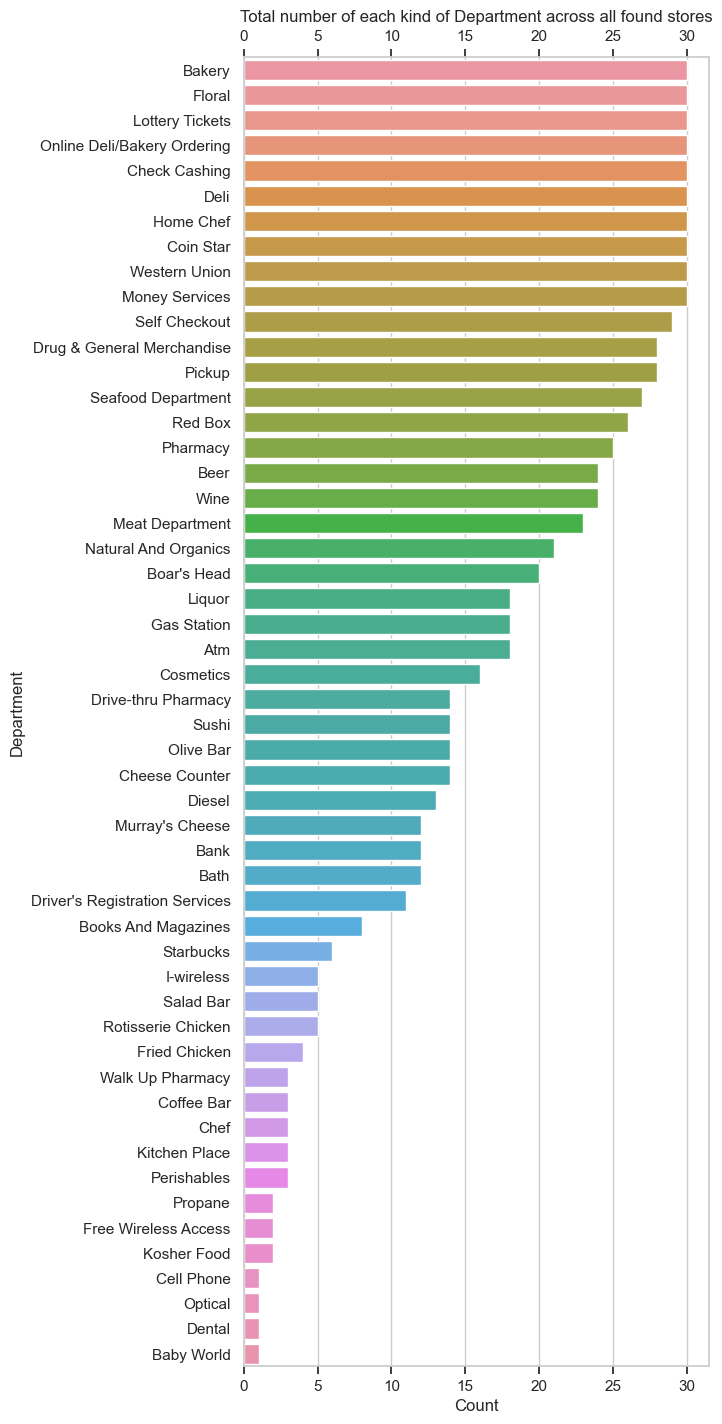

In [30]:
#Plot a frequency plot
plt.figure(figsize=(6,17))
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=df_dep_filtered,y='Department',x='Count')
ax.tick_params(top=True, labeltop=True, bottom=True, labelbottom=True)
ax.set_title('Total number of each kind of Department across all found stores')

In [55]:
# How many matches for "Chocolate Milk" does each nearby store have?
product_count = []
store_name = []

for store in df_loc['locationId'].values:
    df_prod = utils.extract_product_data("https://api.kroger.com/v1/products", res_dict, 'Mobile', 30, 'ais',store)
    store_name.append(df_loc[df_loc['locationId']==store]['name'].values[0])
    product_count.append(df_prod.shape[0])


In [49]:
df_loc[df_loc['locationId']=='01800365']['name'].values[0]

'Kroger - Washtenaw'

In [56]:
df_prod_stores = pd.DataFrame(list(zip(store_name,product_count)),columns = ['Store_Name','Product_Quantity'])

In [57]:
df_prod_stores

,Store_Name,Product_Quantity
0,Kroger - Ypsilanti,7
1,Kroger - Whittaker,3
2,Kroger - Carpenter Packard,8
3,Kroger - Michigan Canton,3
4,Kroger - Washtenaw,4
5,Kroger - Canton,2
6,Kroger - Plymouth Nixon,1
7,Kroger - Plymouth,3
8,Kroger - Westgate,3
9,Kroger - Westland,8


<Figure size 800x1900 with 0 Axes>

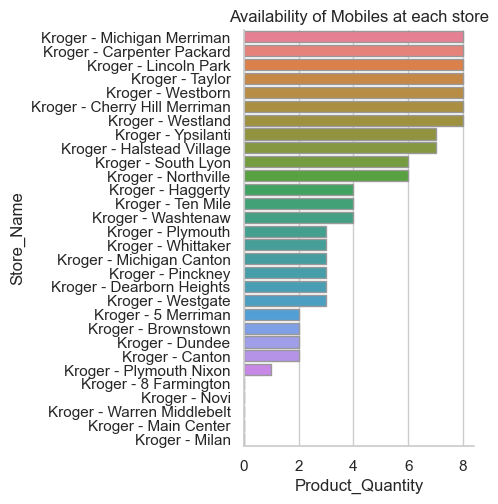

In [72]:
plt.figure(figsize=(8,19))

ax1 = sns.catplot(
    data=df_prod_stores.sort_values(by='Product_Quantity',ascending=False), y="Store_Name", x='Product_Quantity', kind='bar',
    palette="husl", edgecolor=".6",
)
plt.title('Availability of Mobiles at each store');



In [73]:
# Installing completejourney-py package to get the transactions, campaigns, promotions, product details of kroger data for 2500 households.
# This dataset is from 81.54

!pip install completejourney-py

     ---------------------------------------- 0.0/31.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/31.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/31.6 MB 1.1 MB/s eta 0:00:29
     ---------------------------------------- 0.1/31.6 MB 1.3 MB/s eta 0:00:24
     ---------------------------------------- 0.2/31.6 MB 1.3 MB/s eta 0:00:24
     ---------------------------------------- 0.3/31.6 MB 1.3 MB/s eta 0:00:24
     ---------------------------------------- 0.3/31.6 MB 1.4 MB/s eta 0:00:22
      --------------------------------------- 0.4/31.6 MB 1.5 MB/s eta 0:00:21
      --------------------------------------- 0.5/31.6 MB 1.5 MB/s eta 0:00:21
      --------------------------------------- 0.6/31.6 MB 1.6 MB/s eta 0:00:20
      --------------------------------------- 0.7/31.6 MB 1.6 MB/s eta 0:00:19
      --------------------------------------- 0.8/31.6 MB 1.7 MB/s eta 0:00:19
     - -------------------------------------- 0.9/31.6 MB 1.6 MB/s

In [76]:
!pip install ggplot

     ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.2 MB 3.2 MB/s eta 0:00:01
     -------- ------------------------------- 0.5/2.2 MB 5.0 MB/s eta 0:00:01
     ----------------- ---------------------- 1.0/2.2 MB 6.7 MB/s eta 0:00:01
     ---------------------------- ----------- 1.6/2.2 MB 9.2 MB/s eta 0:00:01
     ---------------------------------------- 2.2/2.2 MB 9.4 MB/s eta 0:00:00


In [108]:
from completejourney_py import get_data


transactions = get_data()["transactions"]
promotions = get_data()["promotions"]
products = get_data()['products']
demographics = get_data()['demographics']
campaigns = get_data()['campaigns']
campaigns_desc = get_data()['campaign_descriptions']
coupons = get_data()['coupons']
coupon_redemptions = get_data()['coupon_redemptions']



In [107]:
get_data().keys()

dict_keys(['campaign_descriptions', 'coupons', 'promotions', 'campaigns', 'demographics', 'transactions', 'coupon_redemptions', 'products'])

In [91]:


transactions['Year'] = transactions['transaction_timestamp'].dt.year
transactions['Month'] = transactions['transaction_timestamp'].dt.month

transactions_products = pd.merge(transactions, products, on='product_id',how='inner')
transactions_products_demographics = pd.merge(transactions_products, demographics, on='household_id',how='inner')

transactions_products_demographics= transactions_products_demographics[(transactions_products_demographics['Year'] == 2017)]

income_expenditure_plot=transactions_products_demographics.groupby(['household_id']).agg({
    'income': pd.Series.unique,
    'quantity': sum,
    'sales_value' : sum
})
#display(income_expenditure_plot)
income_expenditure_plot['income']=income_expenditure_plot['income'].astype(str)

# ggplot(income_expenditure_plot, aes(y = "sales_value", x = "quantity", color = "income")) + geom_point(alpha = 0.5, position = "jitter") + geom_smooth(method = "lm", se = False) + labs(x = "Total Units", y = "Total Spending of individual households", title = "Income wise Household Spending - 2017")



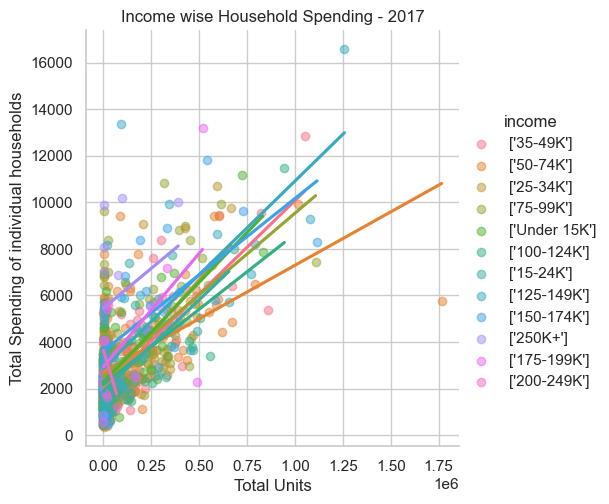

In [92]:
# Create a scatter plot with multiple regression lines
sns.lmplot(data=income_expenditure_plot, x="quantity", y="sales_value", hue="income", scatter=True, ci=None, scatter_kws={"alpha": 0.5})
plt.xlabel("Total Units")
plt.ylabel("Total Spending of individual households")
plt.title("Income wise Household Spending - 2017")
plt.show()


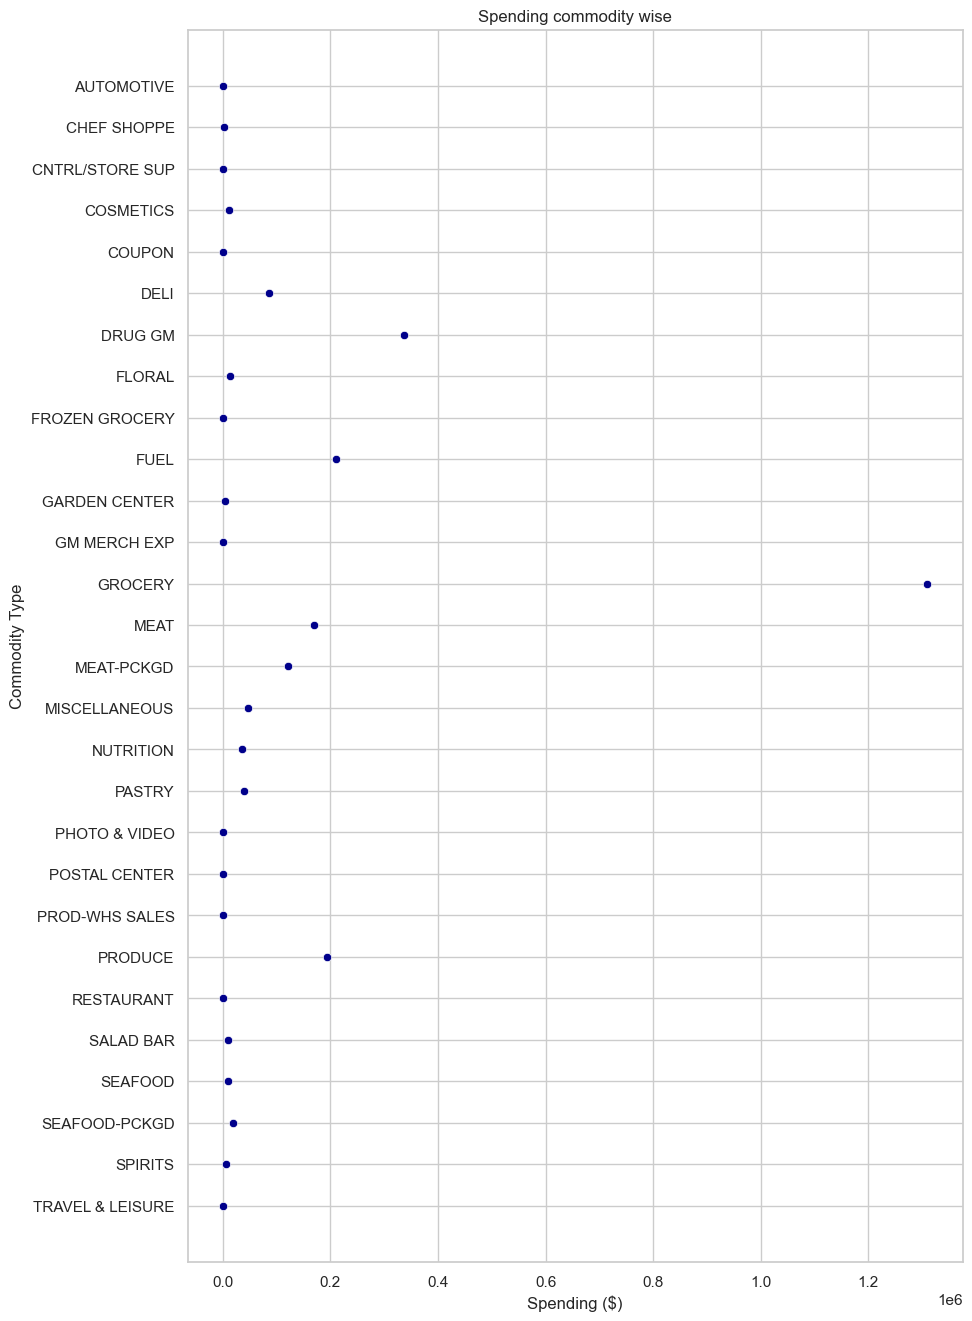

In [98]:
commodity_expenditure=transactions_products_demographics.groupby(['department'],as_index=False).agg({
    'sales_value' : sum
    })
plt.figure(figsize=(10,16))
sns.scatterplot(data=commodity_expenditure, x="sales_value", y="department", color='darkblue')
plt.xlabel("Spending ($)")
plt.ylabel("Commodity Type")
plt.title("Spending commodity wise")
plt.show()

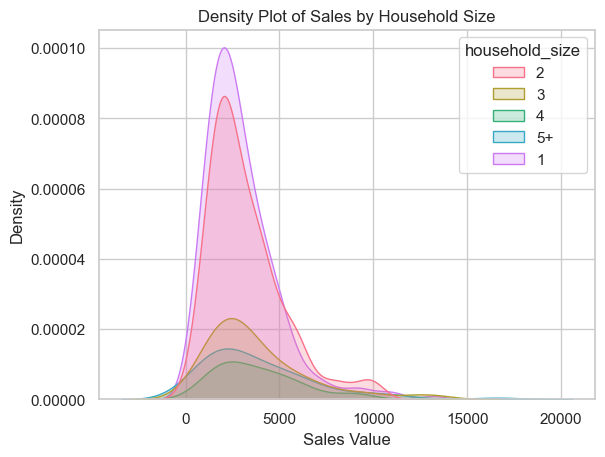

In [105]:
sales_household_size=transactions_products_demographics.groupby(['marital_status','household_size','household_id'],as_index=False).agg({
    'sales_value' : sum
    })

#sns.distplot(data=sales_household_size, x='sales_value', hue='household_size', element='step', fill=True, alpha=0.5, common_norm=False, palette='husl')

sns.kdeplot(data=sales_household_size,x='sales_value',hue='household_size',fill=True,palette='husl')
plt.xlabel("Sales Value")
plt.ylabel("Density")
plt.title("Density Plot of Sales by Household Size")
plt.show()

In [128]:
campaigns_desc.head()

,campaign_id,campaign_type,start_date,end_date,Duration
0,1,Type B,2017-03-03,2017-04-09,37
1,2,Type B,2017-03-08,2017-04-09,32
2,3,Type C,2017-03-13,2017-05-08,56
3,4,Type B,2017-03-29,2017-04-30,32
4,5,Type B,2017-04-03,2017-05-07,34


In [126]:
from datetime import date

campaigns_desc['Duration'] = (campaigns_desc['end_date'] - campaigns_desc['start_date']).dt.days 


Text(0.5, 1.0, 'Duration of Campaigns lasted')

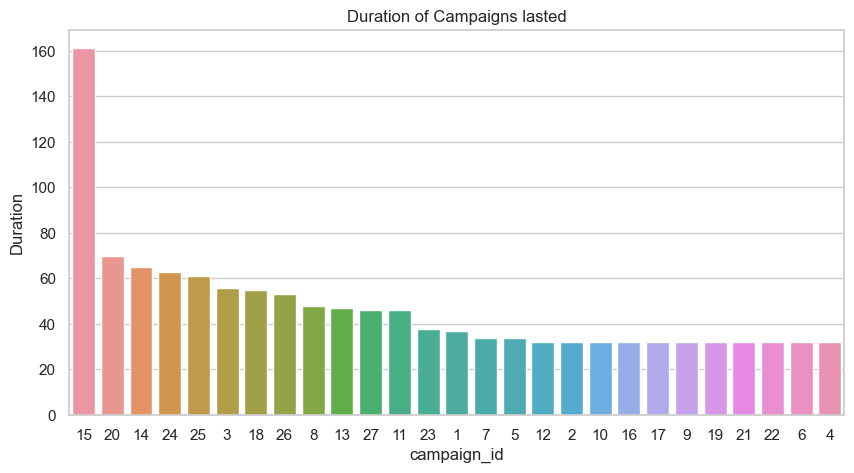

In [135]:
fig = plt.figure(figsize=(10,5))
ax2 = sns.barplot(x="campaign_id",y="Duration",data=campaigns_desc,orient="v",order=campaigns_desc.sort_values('Duration',ascending=False).campaign_id)

ax2.set_title('Duration of Campaigns lasted')


In [138]:
campaigns_desc[['Duration']].describe()

,Duration
count,27.000000
mean,46.888889
std,25.927908
min,32.000000
25%,32.000000
50%,37.000000
75%,54.000000
max,161.000000


In [144]:
total_hshlds = len(transactions.household_id.unique())
#Total Households



In [142]:
len(campaigns.household_id.unique())

1559

Text(0.5, 1.0, 'Analysis of Campaigns reached to households')

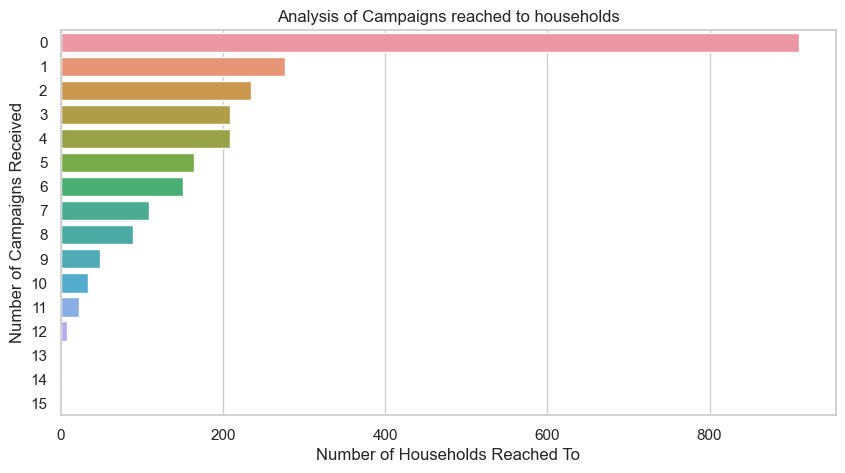

In [147]:
no_of_received_campaigns_per_house = campaigns.household_id.value_counts()
no_of_received_campaigns = no_of_received_campaigns_per_house.value_counts()
no_of_received_campaigns[0] = total_hshlds-len(no_of_received_campaigns_per_house)
no_of_received_campaigns = pd.DataFrame(list(zip(no_of_received_campaigns.index,no_of_received_campaigns)),columns=["Number of Campaigns Received","Number of Households Reached To"]).sort_values(by="Number of Campaigns Received",ascending=True)
plt.figure(figsize=(10,5))
ax3 = sns.barplot(y="Number of Campaigns Received",x="Number of Households Reached To",data=no_of_received_campaigns,orient="h",order=no_of_received_campaigns["Number of Campaigns Received"])
ax3.set_title('Analysis of Campaigns reached to households')


Text(0.5, 1.0, 'Analysis of most frequent campaigns')

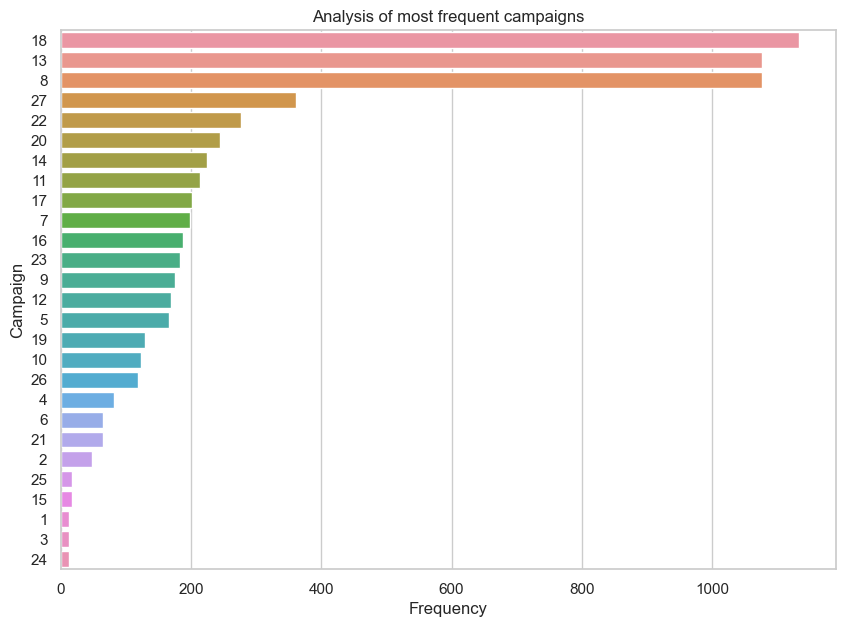

In [149]:
freq_campaigns = pd.DataFrame(list(zip(campaigns.campaign_id.value_counts().index, campaigns.campaign_id.value_counts())),columns=["Campaign","Frequency"])
fig = plt.figure(figsize=(10,7))
ax4 = sns.barplot(y="Campaign",x="Frequency",data = freq_campaigns,orient="h",order=freq_campaigns.Campaign)
ax4.set_title('Analysis of most frequent campaigns')


In [ ]:
#Understanding the coupon redemption data to know which campaign was more effective

len(coupon_redemptions.household_key.unique())



Text(0.5, 1.0, 'Number of redeems per campaign')

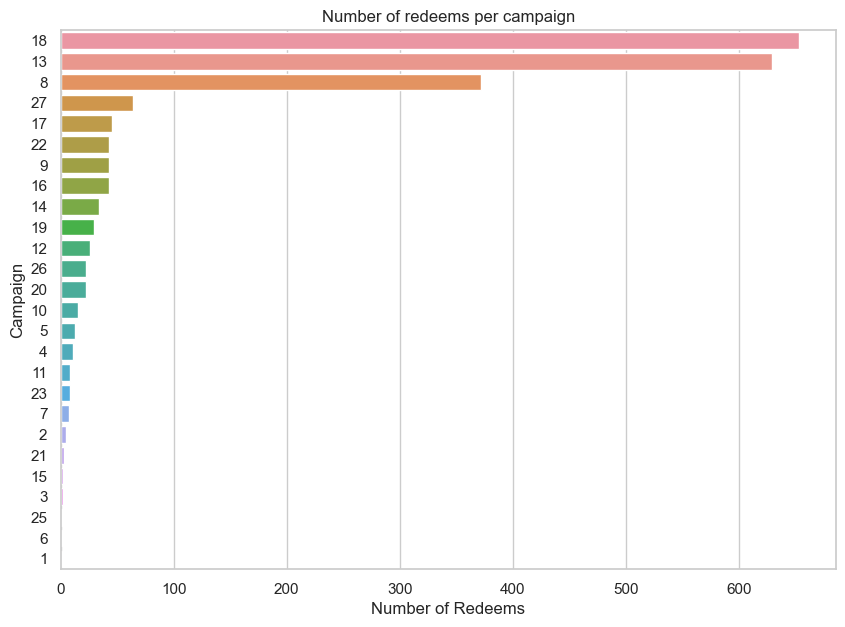

In [152]:
# Understanding the number of redeems per campaign

redeem_frequency = pd.DataFrame(list(zip(coupon_redemptions.campaign_id.value_counts().index, coupon_redemptions.campaign_id.value_counts())),columns=["Campaign","Number of Redeems"])
fig = plt.figure(figsize=(10,7))
ax5 = sns.barplot(y="Campaign",x="Number of Redeems",data = redeem_frequency,orient="h",order=redeem_frequency.Campaign)

ax5.set_title('Number of redeems per campaign')

C:\Users\srira\AppData\Local\Temp\ipykernel_36076\4022206094.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_per_store = transactions.groupby("store_id").sum()["sales_value"].sort_values(ascending=False)


Text(0.5, 1.0, 'Top 20 stores based on total purchases')

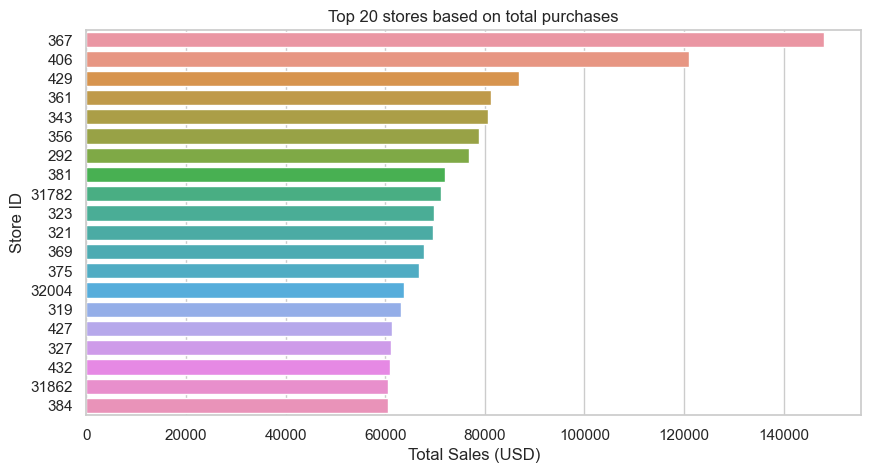

In [157]:
# Top 20 stores based on total sales

sales_per_store = transactions.groupby("store_id").sum()["sales_value"].sort_values(ascending=False)
sales_per_store = pd.DataFrame(list(zip(sales_per_store.index,sales_per_store)),columns=["Store ID","Total Sales (USD)"])
fig_store = plt.figure(figsize=(10,5))
sns.barplot(y="Store ID",x="Total Sales (USD)",data = sales_per_store[:20],order=sales_per_store[:20]["Store ID"],orient="h")

plt.title('Top 20 stores based on total purchases')

C:\Users\srira\AppData\Local\Temp\ipykernel_36076\1491167046.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  purc_per_cust = transactions.groupby("household_id").sum()["sales_value"].sort_values(ascending=False)


Text(0.5, 1.0, 'Top 20 households based on total purchases')

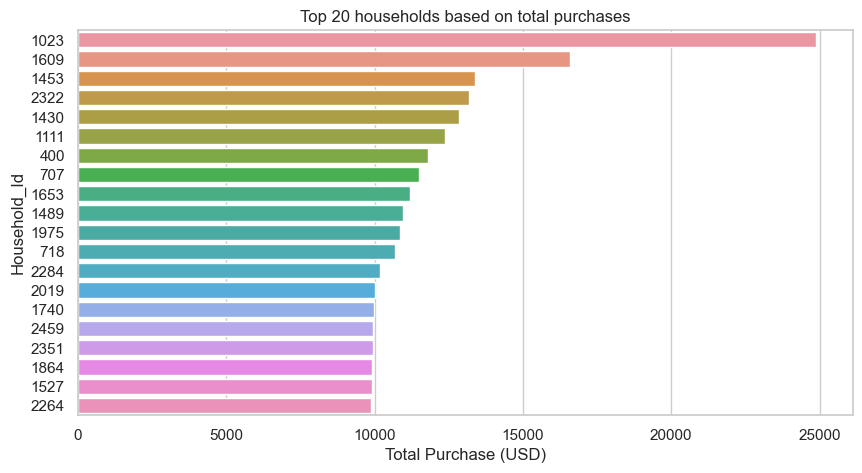

In [156]:
# Top 20 households based on total purchase amount

purc_per_cust = transactions.groupby("household_id").sum()["sales_value"].sort_values(ascending=False)
purc_per_cust = pd.DataFrame(list(zip(purc_per_cust.index,purc_per_cust)),columns=["Household_Id","Total Purchase (USD)"])
fig_store = plt.figure(figsize=(10,5))
sns.barplot(y="Household_Id",x="Total Purchase (USD)",data = purc_per_cust[:20],order=purc_per_cust[:20]["Household_Id"],orient="h")

plt.title('Top 20 households based on total purchases')

In [1]:
!pip install nbconvert